# Homework ML Zoomcamp Week 2

## EDA

In [164]:
# Load the data

# Import modules
import pandas as pd
import numpy as np

# import data
data = 'https://raw.githubusercontent.com/katrinlaura73/MLZoomcamp/main/housing.csv'

df = pd.read_csv(data)

# Check import
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


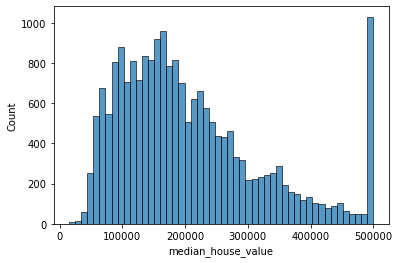

In [165]:
# Look at the median_house_value variable. Does it have a long tail?

# import modules
import matplotlib.pyplot as plt
import seaborn as sns

# magic command
%matplotlib inline

# plot median_house_value
sns.histplot(df['median_house_value'], bins=50);

The question: Does the median_house_value variable have a long tail? No. It seems the data has been cut at the value 500000.

## Feature selection

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

Select only them.

In [166]:
# define cols to use

use_cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

df = df[use_cols]

# Check if df exists only of use_cols
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

## Question 1

In [167]:
# Find a feature with missing values. How many missing values does it have?

df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The column 'total_bedrooms' has 207 missing values.

## Question 2

In [168]:
# What's the median (50% percentile) for variable 'population'?

df['population'].median()

1166.0

The median (50% percentile) for variable 'population is 1166.

## Split data

Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [169]:
# Shuffle dataset with seed 42
np.random.seed(42)

# caclulate len of dataframe  and shuffle result
n = len(df)
print('n:', n, '\n')
# calculate len of val and test sets
n_val = int(n * 0.2)
print('n_val:', n_val, '\n')
n_test = n_val
print('n_test:', n_test, '\n')
#n_train = "rest"
n_train = n - n_val - n_test
print('n_train:', n_train)

n: 20640 

n_val: 4128 

n_test: 4128 

n_train: 12384


In [170]:
# shuffle n
idx = np.arange(n)
np.random.shuffle(idx)

# split train/test/val-sets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# check split
len(df_train), len(df_val), len(df_test)


(12384, 4128, 4128)

In [171]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [172]:
# Set target
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

# check target
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [173]:
# delete target from dataframe

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# check delete
print(df_train.head())

   latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
0     36.06    -119.01                25.0       1505.0             NaN   
1     35.14    -119.46                30.0       2943.0             NaN   
2     37.80    -122.44                52.0       3830.0             NaN   
3     34.28    -118.72                17.0       3051.0             NaN   
4     36.62    -121.93                34.0       2351.0             NaN   

   population  households  median_income  
0      1392.0       359.0         1.6812  
1      1565.0       584.0         2.5313  
2      1310.0       963.0         3.4801  
3      1705.0       495.0         5.7376  
4      1063.0       428.0         3.7250  


## Question 4

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [174]:
# Define training a linear regression model using code  from lessons
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [175]:
# Compute mean of training set

mean_tb_train = df_train['total_bedrooms'].mean()
print('mean total bedrooms:', mean_tb_train)

# Prepare data for Training

base =  ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']

#Define peparing function

def prepare_X(df, col, fill_no=0):
    df = df.copy()
    
    df_num = df[base]
    
    df_num['%s_%s' % (col, 'fd')] = df[col].fillna(fill_no)
    
    X = df_num.values
    
    return X

mean total bedrooms: 533.4803317730147


In [176]:
# Compute RMSE using code  from lesson
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [177]:
# Train Linear Regression with fill missing values with 0
col = 'total_bedrooms'

X_train_zero = prepare_X(df_train,col, 0)
w0, w = train_linear_regression(X_train_zero, y_train)

X_val_zero = prepare_X(df_val, col, 0)
y_pred_zero = w0 + X_val_zero.dot(w)
rmse_zero = rmse(y_val, y_pred_zero)
print('RMSE for Linear Regression with fill missing values with 0:',rmse_zero, round(rmse_zero,2))

RMSE for Linear Regression with fill missing values with 0: 0.3295330365228656 0.33


In [178]:
# Train Linear Regression with fill missing values with mean from training set

X_train_mean = prepare_X(df_train, col, mean_tb_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val,col, mean_tb_train)
y_pred_mean = w0 + X_val_mean.dot(w)
rmse_mean = rmse(y_val, y_pred_mean)
print('RMSE for Linear Regression with fill missing values with mean:',rmse_mean, round(rmse_mean,2))

RMSE for Linear Regression with fill missing values with mean: 0.3290195439003925 0.33


Rounded to 2 digits both RMSE's are equal, not rounded filling missing values with mean is slightly better.

## Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

In [179]:
# Make a new training function with regularization using code from lesson

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # Add regularization
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [180]:
# Prepare data with filling missing numbers with 0
X_train = prepare_X(df_train, col, 0)
X_val = prepare_X(df_val, col,0)

In [181]:
# Try different r for regularization

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    score_rmse = rmse(y_val, y_pred)
    
    print(r, w0, score_rmse, round(score_rmse, 2))

0 -11.686975242109717 0.3295330365228656 0.33
1e-06 -11.686959175752467 0.3295330361647215 0.33
0.0001 -11.685368865374087 0.3295330009706893 0.33
0.001 -11.670931318217315 0.3295327038672127 0.33
0.01 -11.528493585768743 0.3295319365996571 0.33
0.1 -10.274500282143533 0.32969472053949334 0.33
1 -4.920480897753913 0.3337887220008765 0.33
5 -1.4820957456983253 0.33924853455033244 0.34
10 -0.7899311832095876 0.3406063807809514 0.34


The best rmse is for r = 0.01 but only if I do not round the rmse.

## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [182]:
# Evaluate model for different seeds

score_rmse_list = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # set seed
    np.random.seed(s)
    
    #shuffle idx
    np.random.shuffle(idx)
    
    # Split dataset
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    # Reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Set target
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    # Drop target
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Prepare Data
    X_train = prepare_X(df_train, col, 0)
    X_val = prepare_X(df_val, col,0)
    
    # Train model without regularization
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score_rmse = rmse(y_val, y_pred)
    score_rmse_list.append(score_rmse)
    
    print(s, w0, 'rmse:', score_rmse, round(score_rmse, 2) )

0 -11.294920047544444 rmse: 0.3559157375990223 0.36
1 -12.064144126864868 rmse: 0.34755448619821705 0.35
2 -11.332816282493289 rmse: 0.3451076185195358 0.35
3 -11.788041273724975 rmse: 0.33994277780939763 0.34
4 -11.377108224486754 rmse: 0.3466419731676044 0.35
5 -11.372709626976501 rmse: 0.33414874403251815 0.33
6 -11.756896808280592 rmse: 0.34575231053179895 0.35
7 -11.720791314329023 rmse: 0.34349121952584677 0.34
8 -11.726128460702004 rmse: 0.3415180804182667 0.34
9 -11.658897201196247 rmse: 0.34264921138118315 0.34


In [183]:
# Calculate standard deviation

std_rmse = np.std(score_rmse_list)

print(round(std_rmse,3))

0.005


## Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [184]:
# Split dataset with seed 9
# set seed
np.random.seed(9)
    
#shuffle idx
idx = np.arange(n)
np.random.shuffle(idx)
    
# Split dataset
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
# Set target
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
    
# Drop target
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#Combine train and validation set
df_train_full = pd.concat([df_train, df_val])
y_train_full = np.concatenate([y_train, y_val])
    
# Prepare Data filling missing values with 0
X_train_full = prepare_X(df_train_full, col, 0)
X_test = prepare_X(df_test, col, 0)
    
# Train model with regularization r = 0.001
w0, w = train_linear_regression_reg(X_train_full, y_train_full, 0.001)
y_pred = w0 + X_test.dot(w)

# Calculate score
score_rmse = rmse(y_test, y_pred)
print('RMSE on test dataset:', score_rmse, round(score_rmse, 2))

RMSE on test dataset: 0.3453168914356042 0.35
